## Welcome, earthling.  You've made it to to week 2.

### I) Recap and psych-up

Last week was a BIG one!  You continued to hone your skills with loop and general syntax, but you also learned how to deal with lists/arrays, and how to plot data... or what fancy people call *data visualization*.  Woo woo.  All of these skills are going to be important going forward.  You'll keep getting better with them, so if you're still feeling usure DON'T PANIC.

This week, you'll pick up one last skill: how to read in and write data to file.
Most modern research fields depend on analyzing sets of data.  You may have done this earlier in your life with a spreadsheet program like Excel, and this is fine for some tasks.
When datasets get LARGE or one is interested in more sophisticated or multi-dimensional analyses, Excel (or similar) ain't going to cut it. 


* * *

### II) File I/O

We've now seen that computers are better than humans at completing repetitive, tedious tasks.
Computers are also better than humans at storing and retrieving data (the retrieval claim is debatable).  Once we've generated a large dataset, we want to store it in a file, and (hopefully) retreive that data for later analysis.  These activities are usually referred to as "File Input/Output" or "File I/O".

##### Writing to file
Writing to file is simple with python.  Check out this code:

In [1]:
outputfile = open("testfile.txt","w")
statement = "Hello, world!"
outputfile.write(statement)
outputfile.close()

The first line creates/opens a new file called "testfile.txt".  I've told python to open the file in write mode by specifying the "w", meaning that python can expect to only be putting info *into* it.  The second line writes the text "Hello world!" into the file.  The third line closes the file, i.e., tells python that we're done with it for now.  When you run this code, you should find that there's a new file "testfile.txt" in the same directory where this notebook file lives.  If not, you got problems; figure them out before proceeding.

Even if it *did* work, do this problem:

#### Problem 1:
Write a snippet of code that creates a new file called "tonz_of_numberz.txt" and writes 100000 random numbers between 0 and 1 into it.  Each line of the file should have its own number.



In [2]:
# put your problem 1 code here

##### Strings
In the previous two weeks, we worked mostly with *numbers*. In the above snippet, however, we set the value of the variable statement to be something that definitely wasn't a number.  This is legal because in addition to float and int, python has another type of variable called a *string*.  A string is any... well, string of alpha-numeric characters.  Strings have different behaviors from ints and floats, but they are very useful for reading and writing to file.  In fact, when python writes anything (even a number) to file, if first converts it to a string.  When python reads anything (even something that is obviously [to you or me] a number) from file, it does so as a string.

Here are some string manipulations:

In [1]:
str1 = "house"
str2 = "cat"
str3 = str1 + str2
print("I have a " + str3)

I have a housecat


Strings can be manipulated like this.  In general when we set the value of a variable to be anything in quotes, that variable type is a string.

One must be careful when mixing strings and other types, though.

In [2]:
number_of_cats = 904
sentence1 = "I have "
sentence2 = " housecats."
print(sentence1 + number_of_cats + sentence2)

TypeError: must be str, not int

Oops!  Python doesn't quite know how to combine strings and ints in this case.  I have to be a bit more specific/careful and convert my int to a string:

In [3]:
print(sentence1 + str(number_of_cats) + sentence2)

I have 904 housecats.


See what I did there?  Doing something like "str(41.25)" converts the number into a string that can then be written or printed or read.  Notice that python only needs us to do this when we're blending strings and other types.

There are lots of fun things that one can do with strings.  Here are some examples for you to decipher.

In [4]:
number = 43185726
string1 = str(number)
print(string1)
print(string1.isalpha())
print(string1.isdigit())
print(string1[0])
print(string1[3])
print(string1[-2])
print(string1[2:6])

43185726
False
True
4
8
2
1857


The last few lines show how to access individual characters of a string.  (If you remember working with lists/arrays, you might think of strings as lists of individual characters.)  

"string1[3]" returns the (zero, one, two) third character in the string.  This can be quite useful.

##### Reading from file

Now that you can make files and write to them, you want to re-access that delicious stored information.  How to do this?  Simple!  Let's see what's in that old testfile.txt...

In [2]:
inputfile = open("testfile.txt","r")
line = inputfile.readline()
print(line)
inputfile.close()

Hello, world!


Note the symmetry with the above write example.  You probably could have guessed how to do this just by knowing the write syntax and knowing the verbs "read" and "write." 


Okay!  Here are some problems to get you cooking:
* * *
#### Problem 2:
Read in all of the numbers in the file tonz_of_numberz.txt (you made that, right?) and count how many are greater than 0.75.

In [3]:
# put your problem 2 code here

#### Problem 3: 
Read in all of the numbers in the file tonz_of_numberz.txt and count the number that have a '3' in their thenths place.  Can you justify the count?


In [4]:
# put your problem 3 code here


#### Problem 4:
Read in all of the numbers in the file tonz_of_numberz.txt and count the number that have the numeral '3' anywhere in them.  Can you justify the count?

In [5]:
# put your problem 4 code here

#### Problem 5:
Read in all of the numbers in the file tonz_of_numberz.txt and check to see how many of them begin with '0.1234'.  Can you justify the count?

In [6]:
# put your problem 5 code here

****

Often in the sciences we deal with large files that represent large datasets.  You can picture a spreadsheet (perhaps made in a spreadsheet software which shall not be named) in which information is organized in rows and columns.  Typically, we think of each row as being a single event, and each column representing the different features that characterize the events.

In order to work with this data, you might use a graphical spreadsheet program.  What would you do, however, if your spreadsheet had data for tens of thousands of events (or more), each with multiple features?  Programs like Excel (there, I said it) can be quite cumbersome or even unworkable for big data.

Programming allows us to read in data and perform calculations easily.  The following block of code reads in the data in the file parab_t_and_y.txt, and makes a plot of the second column's information (position) versus the first column's position.  The data are stored as two lists of numbers (one for t and one for x).  Python can only read in strings, so we'll split each line into two strings and then convert them to floats.  Make sure that you understad each line of the code below before proceeding.

Be sure to download the data file and put it in the same directory as this notebook!

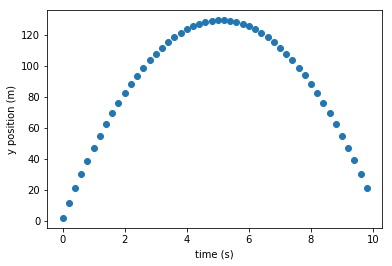

In [7]:
import numpy as np
import matplotlib.pyplot as plt

in_file = open("parab_t_and_y.txt", "r")
t_list = []
y_list = []
line = in_file.readline()        # read in the first line
while len(line) > 1:             # keep doing loop until there's no more data in the file
    line_list = line.split(",")  # split the string at each comma
    t = float(line_list[0])      # convert time string to a float
    y = float(line_list[1])      # convert position string to a float
    t_list.append(t)       
    y_list.append(y)
    line = in_file.readline()
    
t_arr = np.array(t_list)
y_arr = np.array(y_list)

plt.plot(t_arr, y_arr, 'o')
plt.xlabel('time (s)')
plt.ylabel('y position (m)')
plt.show()

The data file that was read in above is a "csv" or comma-separated-value file.  This is very similar to the way that, say, Excel stores data, but we're able to access it directly.   : )

Python offers some really elegant ways of dealing with strings, but the basic tools in the code block above are soooooo useful.  We'll return to them in a few weeks.

****
### Well, that's it!
That was a nice "short" one.  Yesssssss!  

You now know almost all of the tools that you need to start doing real data science.  (In a few weeks, we'll talk about how to fit functions to data -- that's the last piece [for us, at least].)

The work that you'll do over the next two weeks will encourage you to refine and become more confortable with these skills.  

### Good luck, humans.

#### Sincerely,
The Automator
